In [ ]:
from src import Pipeline, PoolingEncoder, UpscaleDecoder, Classifier
from os.path import join
from torchvision import transforms

In [ ]:
ae_width = 12
save_dir = join("..", "finetuning_methodology", f"width_{ae_width}")

e_params = {
    "dense" : False,
    "width" : ae_width,
    "BN" : True,
    "conv_per_layer":2,
    "Dropout":0.2}

d_params = {
    "dense" : False,
    "width" : ae_width,
    "BN" : True,
    "conv_per_layer":2,
    "Dropout":0}

dense_params = {"width":ae_width * 64,
               "depth":0,
               "Dropout":0.2,
               "BN" : True}

pipeline_config = {
    "transform_train": transforms.Compose([transforms.RandomHorizontalFlip(),
                                   transforms.ColorJitter(brightness=0.1, contrast=0.1),
                                   transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(1, 1)),
                                   transforms.ToTensor()]),
    "transform_test": transforms.Compose([transforms.ToTensor()]),
    "train_bs": 64,
    "test_bs": 512,
    "lr": 1e-4,
    "train_prop":{"bird":0.5, "deer":0.5, "truck":0.5},
    "noise" : 0.2,
    "masking" : 0,
    "l1_pen" : 0
    }

## Preliminary Auto-encoder training

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "decoder"], task="ae", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=50, save_dir=join(save_dir, "pretrained_ae"), save_nets=["encoder", "decoder"])


encoder net: activated
decoder net: activated
classifier net: deactivated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Autoencoder loss: 2.423e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.658e-02 | lr: 1.000e-04

Epoch #2
Train:
Autoencoder loss: 1.475e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.389e-02 | lr: 1.000e-04

Epoch #3
Train:
Autoencoder loss: 1.277e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.309e-02 | lr: 1.000e-04

Epoch #4
Train:
Autoencoder loss: 1.177e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.218e-02 | lr: 1.000e-04

Epoch #5
Train:
Autoencoder loss: 1.100e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.162e-02 | lr: 1.000e-04

Epoch #6
Train:
Autoencoder loss: 1.042e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.109e-02 | lr: 1.000e-04

Epoch #7
Train:
Autoencoder loss: 9.933e-03 | lr: 1.000e-04
Validation:
Autoencoder lo

## Methodology 1: Train Classifier with frozen Encoder

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)
pipeline.load_net("encoder", join(save_dir, "pretrained_ae", "encoder.pth"))

pipeline.set_mode(active=["classifier"], task="classification", corrupt=False, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_1"), save_nets=["classifier"])


encoder net: deactivated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 2.074e-02 | Accuracy: 29.49%, (11785/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.954e-02 | Accuracy: 35.53%, (3567/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.888e-02 | Accuracy: 36.55%, (14607/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.853e-02 | Accuracy: 38.27%, (3842/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.816e-02 | Accuracy: 38.74%, (15482/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.801e-02 | Accuracy: 39.73%, (3989/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.776e-02 | Accuracy: 39.92%, (15954/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.765e-02 | Accuracy: 41.17%, (4133/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.744e-02 | Accuracy: 40.98

## Methodology 2: Train Classifier and Encoder (without pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "classifier"], task="classification", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_2"), save_nets=["encoder", "classifier"])


encoder net: activated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 2.117e-02 | Accuracy: 24.07%, (9617/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.838e-02 | Accuracy: 33.74%, (3387/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.841e-02 | Accuracy: 33.74%, (13483/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.647e-02 | Accuracy: 41.11%, (4127/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.709e-02 | Accuracy: 38.34%, (15320/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.548e-02 | Accuracy: 44.26%, (4444/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.612e-02 | Accuracy: 41.94%, (16760/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.477e-02 | Accuracy: 46.72%, (4691/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.558e-02 | Accuracy: 43.73%

## Methodology 3: Train Classifier and Encoder (with pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)
pipeline.load_net("encoder", join(save_dir, "pretrained_ae", "encoder.pth"))

pipeline.set_mode(active=["encoder", "classifier"], task="classification", corrupt=False, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_3"), save_nets=["encoder", "classifier"])


encoder net: activated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 1.769e-02 | Accuracy: 37.74%, (15079/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.501e-02 | Accuracy: 46.46%, (4665/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.451e-02 | Accuracy: 48.43%, (19354/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.298e-02 | Accuracy: 53.73%, (5394/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.311e-02 | Accuracy: 53.57%, (21406/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.195e-02 | Accuracy: 57.69%, (5792/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.216e-02 | Accuracy: 57.02%, (22785/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.110e-02 | Accuracy: 60.81%, (6105/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.147e-02 | Accuracy: 59.64%,

## Methodology 4: Train Classifier, Encoder and Decoder on a combined task (without pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "decoder", "classifier"], task="both", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_4"), save_nets=["encoder", "decoder", "classifier"])


encoder net: activated
decoder net: activated
classifier net: activated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Autoencoder loss: 2.525e-02 | Classifier loss: 2.083e-02 | Accuracy: 25.31%, (10112/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 1.770e-02 | Classifier loss: 1.786e-02 | Accuracy: 36.30%, (3645/10040) | lr: 1.000e-04

Epoch #2
Train:
Autoencoder loss: 1.626e-02 | Classifier loss: 1.800e-02 | Accuracy: 35.37%, (14134/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 1.538e-02 | Classifier loss: 1.644e-02 | Accuracy: 41.28%, (4145/10040) | lr: 1.000e-04

Epoch #3
Train:
Autoencoder loss: 1.420e-02 | Classifier loss: 1.690e-02 | Accuracy: 39.67%, (15853/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 1.429e-02 | Classifier loss: 1.569e-02 | Accuracy: 44.01%, (4419/10040) | lr: 1.000e-04

Epoch #4
Train:
Autoencoder loss: 1.300e-02 | Classifier loss: 1

## Methodology 5: Train Classifier, Encoder and Decoder on a combined task (with pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)
pipeline.load_net("encoder", join(save_dir, "pretrained_ae", "encoder.pth"))
pipeline.load_net("decoder", join(save_dir, "pretrained_ae", "decoder.pth"))

pipeline.set_mode(active=["encoder", "decoder", "classifier"], task="both", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_5"), save_nets=["encoder", "decoder", "classifier"])


encoder net: activated
decoder net: activated
classifier net: activated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Autoencoder loss: 7.948e-03 | Classifier loss: 1.924e-02 | Accuracy: 33.53%, (13399/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 9.094e-03 | Classifier loss: 1.726e-02 | Accuracy: 39.49%, (3965/10040) | lr: 1.000e-04

Epoch #2
Train:
Autoencoder loss: 8.112e-03 | Classifier loss: 1.637e-02 | Accuracy: 42.04%, (16800/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 9.160e-03 | Classifier loss: 1.575e-02 | Accuracy: 44.15%, (4433/10040) | lr: 1.000e-04

Epoch #3
Train:
Autoencoder loss: 9.415e-03 | Classifier loss: 1.517e-02 | Accuracy: 46.11%, (4629/10040) | lr: 1.000e-04

Epoch #4
Train:
Autoencoder loss: 8.091e-03 | Classifier loss: 1.494e-02 | Accuracy: 46.70%, (18662/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 9.319e-03 | Classifier loss: 1

## Methodology 6 : Reference classifier

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "classifier"], task="classification", corrupt=False, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_6"), save_nets=["encoder", "classifier"])


encoder net: activated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 1.971e-02 | Accuracy: 29.02%, (11596/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.606e-02 | Accuracy: 42.60%, (4277/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.665e-02 | Accuracy: 40.07%, (16012/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.459e-02 | Accuracy: 47.97%, (4816/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.553e-02 | Accuracy: 43.92%, (17552/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.383e-02 | Accuracy: 50.45%, (5065/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.479e-02 | Accuracy: 46.94%, (18756/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.321e-02 | Accuracy: 52.50%, (5271/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.415e-02 | Accuracy: 49.38%,

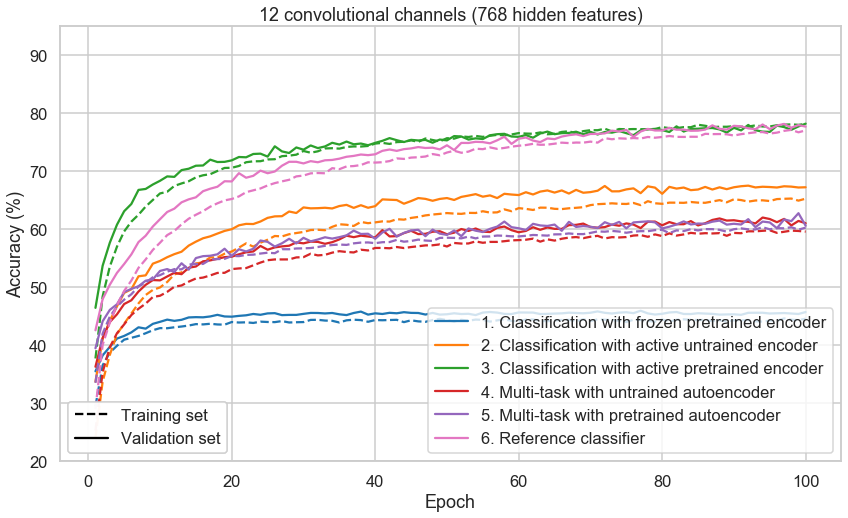

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D

sns.set_style("whitegrid")
sns.set_context("talk")
colors = ("tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:pink")

custom_lines = [Line2D([0], [0], color = c) for c in colors]
custom_lines.append(Line2D([0], [0], ls="--", color = "black"))
custom_lines.append(Line2D([0], [0], color = "black"))


stats = []
train_accuracies = []
val_accuracies = []
for i in range(1, 7):
    stats.append(pd.read_csv(join(save_dir, f"methodology_{i}", "train_history.csv")))
    train_accuracies.append((stats[i-1]["train_correct"] / stats[i-1]["train_total"]).values*100)
    val_accuracies.append((stats[i-1]["val_correct"] / stats[i-1]["val_total"]).values*100)

fig, ax = plt.subplots(1, 1, figsize = (14, 8))

for i in range(6):
    ax.plot(range(1, 101), train_accuracies[i], '--', c = colors[i])
    ax.plot(range(1, 101), val_accuracies[i], c = colors[i])

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

legend = plt.legend(custom_lines, [
    "1. Classification with frozen pretrained encoder",
    "2. Classification with active untrained encoder",
    "3. Classification with active pretrained encoder",
    "4. Multi-task with untrained autoencoder",
    "5. Multi-task with pretrained autoencoder",
    "6. Reference classifier",
], loc=4)

legend1 = plt.legend(custom_lines[6:], [
    "Training set",
    "Validation set"
], loc=3)

plt.ylim([20, 95])
plt.title("12 convolutional channels (768 hidden features)")

plt.gca().add_artist(legend)
plt.gca().add_artist(legend1)